In [1]:
import pandas as pd
import numpy as np
import orca
import warnings; warnings.filterwarnings("ignore")

from lcog import datasources
from lcog import variables
from lcog import models

/home/janowicz/anaconda2/envs/template/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/janowicz/anaconda2/envs/template/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/janowicz/anaconda2/envs/template/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


range(400, 5000, 400)


In [2]:
from urbansim.models import util
from urbansim_templates import modelmanager as mm
from urbansim_templates.models import BinaryLogitStep

In [3]:
mm.initialize()

Registering model step 'elcm5'
Registering model step 'tenure_choice_model'
Registering model step 'repm_sf_detached'
Registering model step 'repm_industrial'
Registering model step 'repm_duplex_townhome'
Registering model step 'elcm12'
Registering model step 'tenure_choice_model2'
Registering model step 'elcm6'
Registering model step 'tenure_choice_model1'
Registering model step 'elcm9'
Registering model step 'elcm1'
Registering model step 'elcm11'
Registering model step 'elcm2'
Registering model step 'repm_multifamily'
Registering model step 'elcm7'
Registering model step 'repm_retail'
Registering model step 'elcm10'
Registering model step 'elcm3'
Registering model step 'elcm8'
Registering model step 'elcm13'
Registering model step 'repm_residential'
Registering model step 'elcm15'
Registering model step 'elcm4'
Registering model step 'repm_office'
Registering model step 'hlcm2'
Registering model step 'household_relocation_choice_model'
Registering model step 'elcm14'
Registering mod

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

from bokeh.io import output_notebook, show
from bokeh.plotting import Figure
from datashader.bokeh_ext import create_ramp_legend, create_categorical_legend
output_notebook()

import datashader.transfer_functions as tf

import datashader as ds
from datashader.colors import viridis

import seaborn as sb


def visualize_variable(variable_name):
    p_b = orca.get_table('buildings').to_frame(['x', 'y', 'building_id'])
    p_1 = orca.get_table('households').to_frame(['building_id', variable_name])
    p = p_1.merge(p_b , on='building_id',how='left')
    
    cvs = ds.Canvas(plot_width=1000, plot_height=700)
    agg = cvs.points(p, 'x', 'y', ds.mean(variable_name))
    img = tf.set_background(tf.shade(agg, cmap=viridis),"white")
    return img

def corr_plot(selected_variables):
    cols = []
    for col in selected_variables:    
        if col.startswith('np'):
            cols.append(col.split('(')[-1][:-1])
        else:
            cols.append(col)

    X = orca.get_table('households_pums').to_frame(cols)

    plt.subplots(figsize=(8, 8))
    sb.heatmap(X.corr(), annot=True, cmap="RdYlGn")
    plt.show()

def var_info(var, vartype = 'discrete', table='households_pums', hue=None, query = None, queryvar = None):
    """Visualize the distribution of a variable from a table. Optional: add second variable (hue) to separate data on.
    Inputs:
    - var = string, name of the column in orca table.
    - vartype = string, variable type. Valid strings: discrete , continuous. Default: discrete
    - table = string, orca table to get the data from. Default: households
    - hue = string or None, Optional second variable to make segments of the first variable. Default: None
    - query = string, query string to analize one part of the table. Default: None
    - queryvar = list of strings, list of column names that appear in query string. Default: None. Warning: if query is not 
       None, queryvar MUST have the query variables.
    Output:
    - Value counts for discrete variable or Description of continuous variable with characteristic metrics
    - Distribution plot with bars and distribution shape"""
    if not query:
        df = orca.get_table(table).to_frame([var, hue])
    else:
        allvars = queryvar.extend([var, hue])
        df = orca.get_table(table).to_frame(allvars)
        df = df.query(query)
    print('{}'.format(var.upper()))
    if df[var].isnull().sum() > 0:
        print('There are {} null values.'.format(df[var].isnull().sum()))
    
    if vartype == 'discrete':
        print('\n Value Count:\n{}\n'.format(df[var].value_counts()))
        ax = sb.catplot(var, data = df , kind= 'count', col = hue)
    elif vartype == 'continuous':
        print('Description:\n{}'.format(df[var].describe()))
        
        if hue:
            for i in df[hue].value_counts().index:
                ax = sb.distplot(df.loc[df[hue] == i, var], label= '{}={}'.format(hue,i ))
        else:
            ax = sb.distplot(df[var], label= '{}'.format(var))
        ax.legend()
        ax.set_title('{} DISTRIBUTION'.format(var.upper()))
        
        if query:
            print('\n Note: data from {} table filtered with: {}'.format(table, query))
    else:
        print('Invalid variable type. Options: discrete or continuous')

Loading BokehJS ...

CHILDREN

 Value Count:
0.0    2474
1.0     720
Name: children, dtype: int64



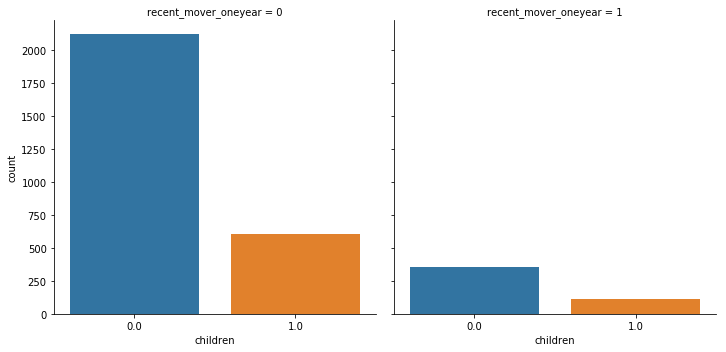

In [5]:
var_info('children','discrete', hue='recent_mover_oneyear')

In [6]:
orca.get_table('households_pums').columns

['persons',
 'income',
 'tenure',
 'serialno',
 'cars',
 'race_of_head',
 'age_of_head',
 'workers',
 'children',
 'recent_mover',
 'recent_mover_oneyear',
 'income_quartile',
 'income_quartile_1',
 'income_quartile_2',
 'income_quartile_3',
 'no_workers',
 'race_notwhite',
 'race_white',
 'race_black',
 'race_asian',
 'no_hispanic_head',
 'zero_carowner',
 'carowner',
 'income_more150K',
 'ratio_income_persons',
 'ratio_cars_workers',
 'tenure_rent',
 'tenure_own',
 'living_alone',
 'ln_age_of_head',
 'ln_persons',
 'ln_workers',
 'ln_income',
 'ln_cars',
 'ln_ratio_income_persons',
 'ln_ratio_cars_workers']

## HRLCM: Households ReLocation Binary Choice Model

In [7]:
m = BinaryLogitStep()
m.tables = ['households_pums']

In [8]:
model_spec = {'left_side': 'recent_mover_oneyear',
            'right_side':['tenure_rent',
                         'ln_age_of_head',
                          'cars',
                         ]}
m.model_expression = util.str_model_expression(model_spec)

m.fit()

Optimization terminated successfully.
         Current function value: 0.309894
         Iterations 7
                            Logit Regression Results                            
Dep. Variable:     recent_mover_oneyear   No. Observations:                 3194
Model:                            Logit   Df Residuals:                     3190
Method:                             MLE   Df Model:                            3
Date:                  Fri, 25 Jan 2019   Pseudo R-squ.:                  0.2542
Time:                          13:51:00   Log-Likelihood:                -989.80
converged:                         True   LL-Null:                       -1327.2
                                          LLR p-value:                6.129e-146
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.6043      0.671      9.845      0.000       5.290       7.919
t

Disaggregating x to buildings from parcels
Disaggregating y to buildings from parcels


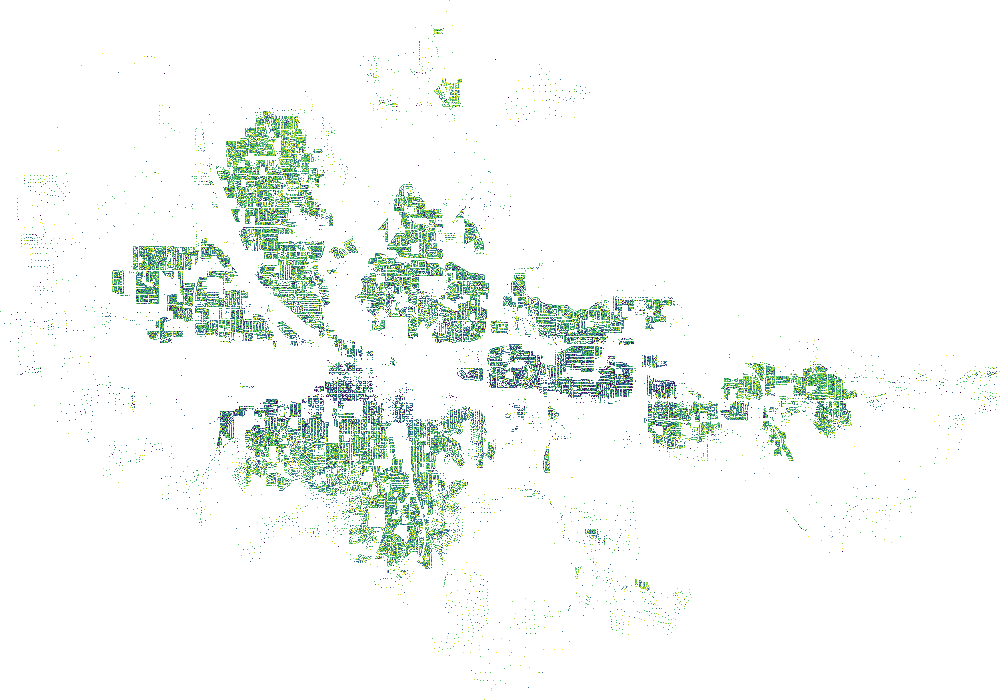

In [9]:
visualize_variable('cars')

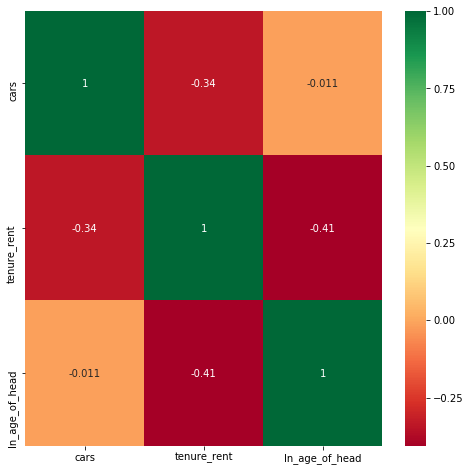

In [10]:
corr_plot(model_spec['right_side'])

In [11]:
m.name = 'household_relocation_choice_model'
m.out_tables = 'households'
m.out_column = 'building_id'
m.out_value_true = -1
m.out_value_false = 'nothing'
mm.register(m)

Saving 'household_relocation_choice_model.yaml': /home/janowicz/clients/lcog/lcog/lcog/configs
Registering model step 'household_relocation_choice_model'


## HTCM: Households Tenure Binary Choice Model

In [12]:
m = BinaryLogitStep()
m.tables = ['households_pums']

In [13]:
model_spec = {'left_side': 'tenure_own',
              'right_side':['income_quartile_1',
                           'income_quartile_2',
                           'income_quartile_3',
                           'ln_age_of_head',
                           'cars',]}
   
m.model_expression = util.str_model_expression(model_spec)

m.fit()

Optimization terminated successfully.
         Current function value: 0.432487
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             tenure_own   No. Observations:                 3194
Model:                          Logit   Df Residuals:                     3188
Method:                           MLE   Df Model:                            5
Date:                Fri, 25 Jan 2019   Pseudo R-squ.:                  0.3202
Time:                        13:51:01   Log-Likelihood:                -1381.4
converged:                       True   LL-Null:                       -2031.9
                                        LLR p-value:                3.856e-279
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -11.8853      0.626    -18.995      0.000     -13.112     -10.659
income_q

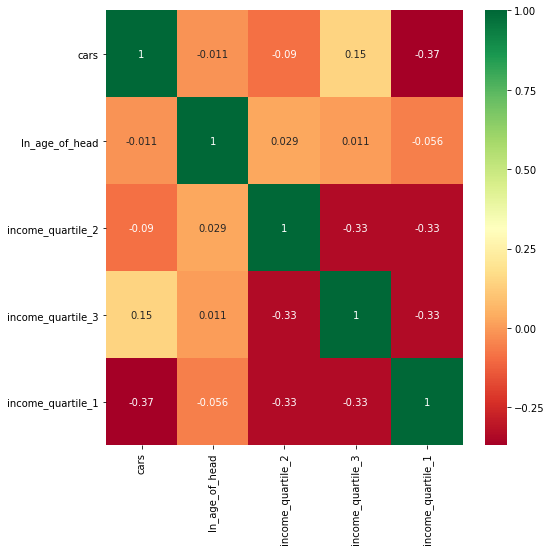

In [14]:
corr_plot(model_spec['right_side'])

In [15]:
m.name = 'tenure_choice_model'
m.out_tables = 'households'
m.out_column = 'tenure'
m.out_filters = ['building_id == -1']
m.out_value_true = 1 #Own
m.out_value_false = 2 #Rent

mm.register(m)

Saving 'tenure_choice_model.yaml': /home/janowicz/clients/lcog/lcog/lcog/configs
Registering model step 'tenure_choice_model'


### SEGMENTS: INCOME-QUARTILES

### LOW INCOME

In [16]:
m = BinaryLogitStep()
m.tables = ['households_pums']
m.filters = ['income_quartile == 1']
model_spec = {'left_side': 'tenure_own',
              'right_side':['ln_age_of_head',
                           'cars',
                           'zero_carowner']}
   
m.model_expression = util.str_model_expression(model_spec)

m.fit()

Optimization terminated successfully.
         Current function value: 0.513358
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             tenure_own   No. Observations:                  799
Model:                          Logit   Df Residuals:                      795
Method:                           MLE   Df Model:                            3
Date:                Fri, 25 Jan 2019   Pseudo R-squ.:                  0.2369
Time:                        13:51:02   Log-Likelihood:                -410.17
converged:                       True   LL-Null:                       -537.49
                                        LLR p-value:                 6.497e-55
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -13.4180      1.153    -11.641      0.000     -15.677     -11.159
ln_age_of_head   

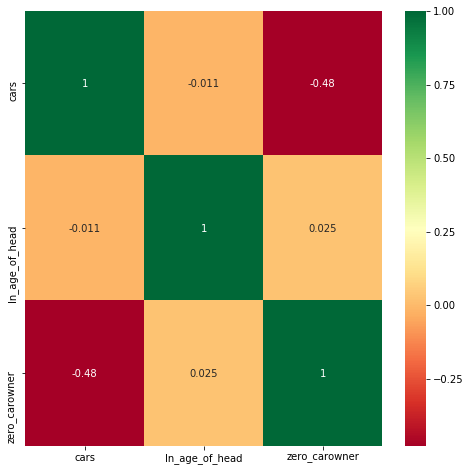

In [17]:
corr_plot(model_spec['right_side'])

In [18]:
m.name = 'tenure_choice_model1'
m.out_tables = 'households'
m.out_column = 'tenure'
m.out_filters = ['building_id == -1', 'income_quartile > 1']
m.out_value_true = 1 #Own
m.out_value_false = 2 #Rent

mm.register(m)

Saving 'tenure_choice_model1.yaml': /home/janowicz/clients/lcog/lcog/lcog/configs
Registering model step 'tenure_choice_model1'


### MID-INCOME

In [19]:
m = BinaryLogitStep()
m.tables = ['households_pums']
m.filters = ['income_quartile == 2']
model_spec = {'left_side': 'tenure_own',
              'right_side':['ln_age_of_head',
                           'ln_cars']}
   
m.model_expression = util.str_model_expression(model_spec)

m.fit()

Optimization terminated successfully.
         Current function value: 0.475697
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             tenure_own   No. Observations:                  798
Model:                          Logit   Df Residuals:                      795
Method:                           MLE   Df Model:                            2
Date:                Fri, 25 Jan 2019   Pseudo R-squ.:                  0.2855
Time:                        13:51:02   Log-Likelihood:                -379.61
converged:                       True   LL-Null:                       -531.25
                                        LLR p-value:                 1.381e-66
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -16.5207      1.240    -13.324      0.000     -18.951     -14.090
ln_age_of_head   

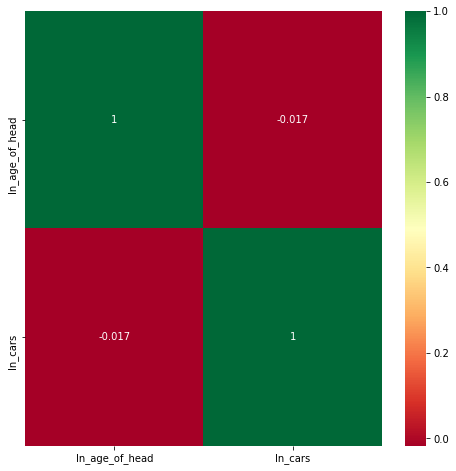

In [20]:
corr_plot(model_spec['right_side'])

In [21]:
m.name = 'tenure_choice_model2'
m.out_tables = 'households'
m.out_column = 'tenure'
m.out_filters = ['building_id == -1', 'income_quartile == 2']
m.out_value_true = 1 #Own
m.out_value_false = 2 #Rent

mm.register(m)

Saving 'tenure_choice_model2.yaml': /home/janowicz/clients/lcog/lcog/lcog/configs
Registering model step 'tenure_choice_model2'


### HIGH-INCOME

In [22]:
m = BinaryLogitStep()
m.tables = ['households_pums']
m.filters = ['income_quartile >= 3']
model_spec = {'left_side': 'tenure_own',
              'right_side':['ln_age_of_head',
                           'ln_cars',
                            'ln_income'
                           ]}
   
m.model_expression = util.str_model_expression(model_spec)

m.fit()

Optimization terminated successfully.
         Current function value: 0.357513
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             tenure_own   No. Observations:                 1597
Model:                          Logit   Df Residuals:                     1593
Method:                           MLE   Df Model:                            3
Date:                Fri, 25 Jan 2019   Pseudo R-squ.:                  0.2250
Time:                        13:51:02   Log-Likelihood:                -570.95
converged:                       True   LL-Null:                       -736.72
                                        LLR p-value:                 1.479e-71
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -29.6778      2.635    -11.263      0.000     -34.842     -24.513
ln_age_of_head   

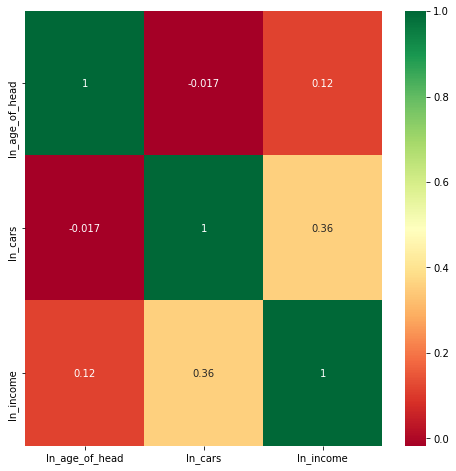

In [23]:
corr_plot(model_spec['right_side'])

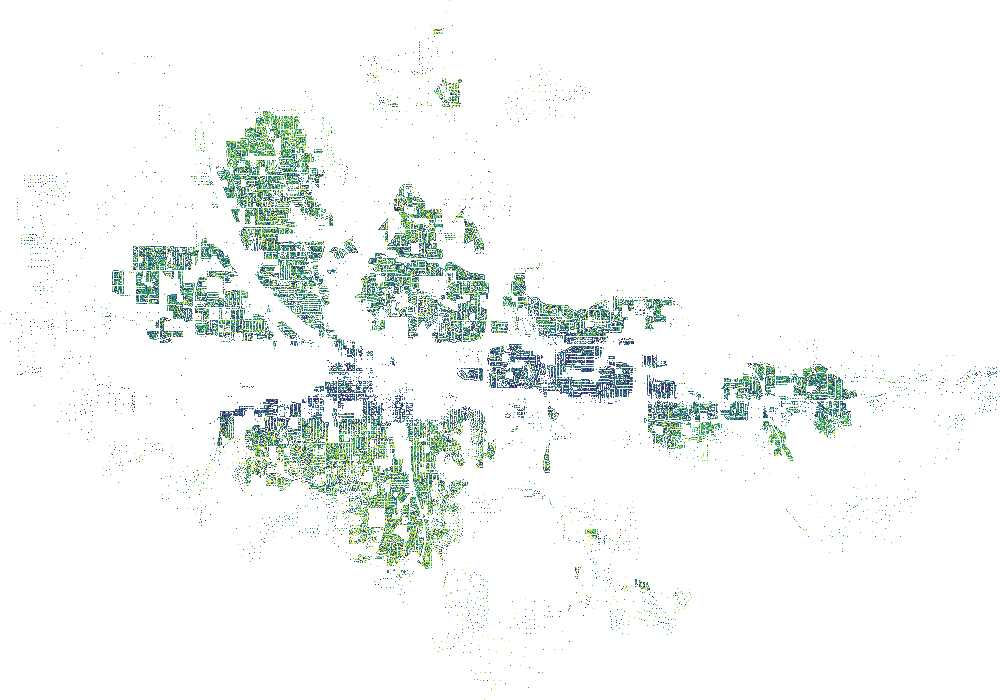

In [24]:
visualize_variable('income')

In [25]:
m.name = 'tenure_choice_model3'
m.out_tables = 'households'
m.out_column = 'tenure'
m.out_filters = ['building_id == -1', 'income_quartile >= 3']
m.out_value_true = 1 #Own
m.out_value_false = 2 #Rent

mm.register(m)

Saving 'tenure_choice_model3.yaml': /home/janowicz/clients/lcog/lcog/lcog/configs
Registering model step 'tenure_choice_model3'
